In [22]:
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [23]:
# cramer v test
def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building
    stat = chi2_contingency(crosstab)[0]  # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table
    return stat / (obs * mini)

# view max and min of a column and other stats
def desc(ds, colname):
    print(ds[colname].values[0:10])
    print(ds[colname].describe())


In [24]:
# load dataset
df = pd.read_csv('london_clean.csv')
len(df)

1453312

In [25]:
# compute chi square correlation, suitable for categorical values
# source: https://www.youtube.com/watch?v=_jdfjRzaHMM
tips_categorical = df[
    [
        'DateOfCall', 'CalYear', 'HourOfCall', 'IncidentGroup', 
        'PropertyType', 'PumpHoursRoundUp', 'NumPumpsAttending', 
        'Notional Cost (£)', 'PropertyCategory'
    ]
]

rows = []

for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(
            tips_categorical[var1], tips_categorical[var2]
        )  # Cramer's V test
        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V
    rows.append(col)

cramers_results = np.array(rows)
df2 = pd.DataFrame(
    cramers_results, columns=tips_categorical.columns, index=tips_categorical.columns
)


In [26]:
df2

,DateOfCall,CalYear,HourOfCall,IncidentGroup,PropertyType,PumpHoursRoundUp,NumPumpsAttending,Notional Cost (£),PropertyCategory
DateOfCall,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.01,0.00
CalYear,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.50,0.00
HourOfCall,0.00,0.0,1.00,0.01,0.00,0.00,0.00,0.00,0.00
IncidentGroup,0.00,0.0,0.01,1.00,0.31,0.04,0.07,0.04,0.22
PropertyType,0.00,0.0,0.00,0.31,1.00,0.00,0.01,0.00,1.00
PumpHoursRoundUp,0.00,0.0,0.00,0.04,0.00,1.00,0.55,0.99,0.00
NumPumpsAttending,0.00,0.0,0.00,0.07,0.01,0.55,1.00,0.70,0.01
Notional Cost (£),0.01,0.5,0.00,0.04,0.00,0.99,0.70,1.00,0.00
PropertyCategory,0.00,0.0,0.00,0.22,1.00,0.00,0.01,0.00,1.00


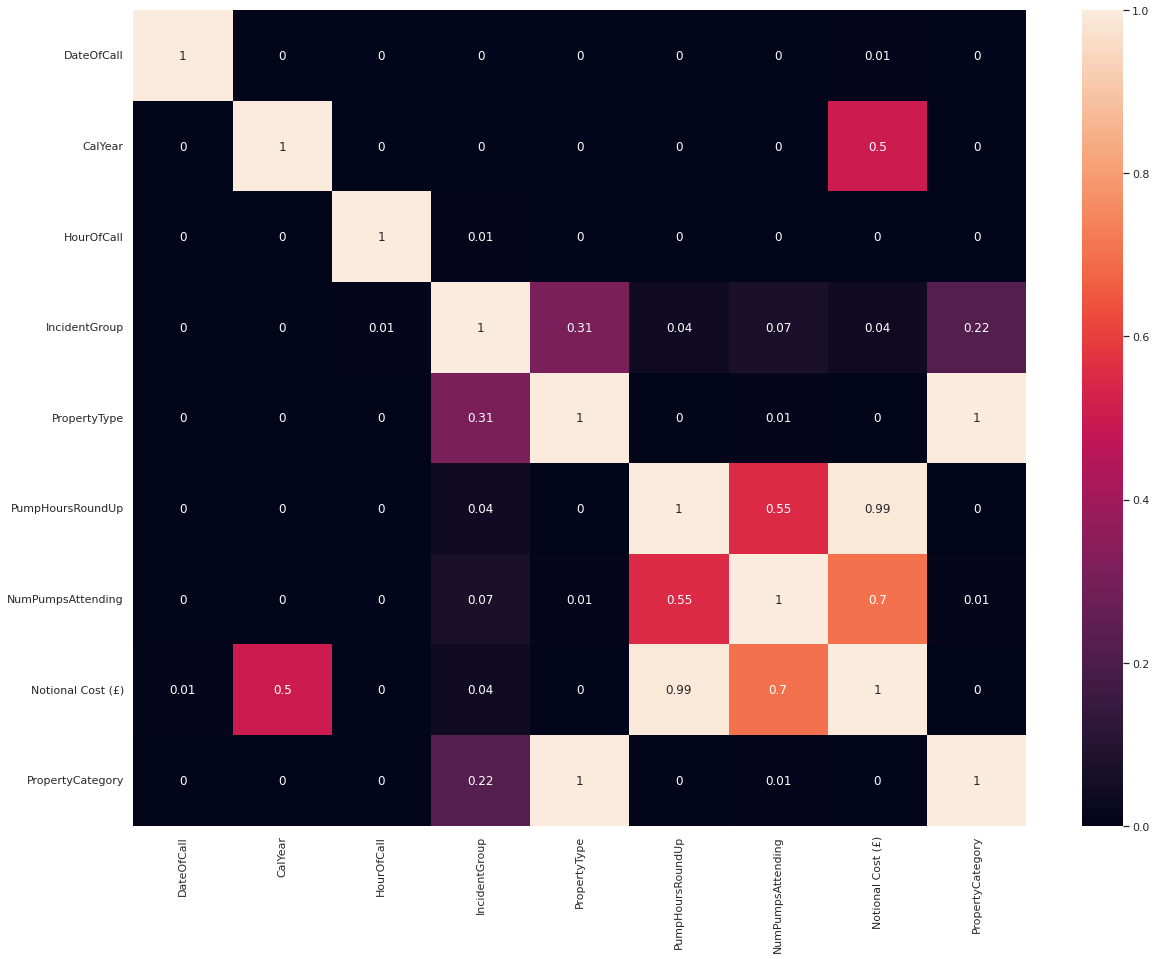

In [27]:
# plotting the heatmap
sns.set(rc={'figure.figsize':(20,15)})
hm = sns.heatmap(data=df2, annot=True)

# displaying the plotted heatmap
plt.show()